# Smoking Habits in the UK
### Osato Aziegbe | 100818095

![Smoking Kills](https://professorramosblog.files.wordpress.com/2018/05/cigarette-is-dangerous.gif)

The overarching goal of my analysis is to identify trends and patterns in smoking habits across different variables. By delving into this dataset, I aim to answer key questions that shed light on the dynamics of smoking behavior in the UK. My inquiry spans a variety of dimensions, allowing for a comprehensive understanding of how different factors may influence smoking habits. The chosen dataset encompasses a range of demographic variables, such as sex, age, marital status, highest education qualification, race, income e.t.c. Analyzing how these socio-economic factors correlate with smoking behavior can contribute to a nuanced understanding of the determinants of smoking in the UK. The data was retrieved by the National STEM Learning Centre and is publicly accessible at https://www.stem.org.uk/resources/elibrary/resource/28452/large-datasets-stats4schools.

## INDEX
    [LOADING](#loading)
    └ [CLEANING](#cleaning)
    └ [ANALYSIS + PLOTS](#analysis--plots)
    └ [MANIPULATION](#manipulation)
    └ [DISCUSSION](#discussion)
    └ [REFERENCES](#references)

In [157]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading
Load data from URL

In [314]:
smoking = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/openintro/smoking.csv')

In [315]:
# Understanding the structure of our data
print(smoking.shape)
# Display
display(smoking)

(1691, 13)


,rownames,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12,12,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20,20,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20,20,Packets


## Cleaning

In [316]:
# Get rid of unnecessary info
del smoking["rownames"]
# Change formatting
pd.set_option('display.precision', 0)
# Tidy up column names
smoking.columns = ["sex","age","status","education","nationality", "ethnicity", "gross_income", "region", "smoke", "weekends", "weekdays", "type"]
# First 5 rows
smoking.head()

,sex,age,status,education,nationality,ethnicity,gross_income,region,smoke,weekends,weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12,12,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [317]:
smoking = smoking.replace(['Yes','No'], [1,0])
smoking.head()

,sex,age,status,education,nationality,ethnicity,gross_income,region,smoke,weekends,weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,0,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1,12,12,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,0,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,0,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,0,NaN,NaN,NaN


## Analysis + Plots

In [318]:
# Total smokers vs non-smokers
print(f"Sample size: {smoking.shape[0]}, "
      f"Smokers: {smoking[smoking.type.notna()].shape[0]}, "
      f"Non-smokers: {smoking[smoking.type.isna()].shape[0]}")

Sample size: 1691, Smokers: 421, Non-smokers: 1270


Does smoking and gender have a correlation?
Hypothesis: there are more male than female smokers.

In [319]:
# Smoking vs. gender
sex = {"Male smoker": smoking[(smoking.smoke==1) & (smoking["sex"]=='Male')],
          "Female smoker": smoking[(smoking.smoke==1) & (smoking["sex"]=='Female')],
          "Male non-smoker": smoking[(smoking.smoke==0) & (smoking["sex"]=='Male')],
          "Female non-smoker": smoking[(smoking.smoke==0) & (smoking["sex"]=='Female')]}

# Print results
print(f"Male smoker, Female smoker: {sex.get('Male smoker').shape[0]},",
      f"{sex.get('Female smoker').shape[0]}\n"
      f"Male non-smoker, Female non-smoker {sex.get('Male non-smoker').shape[0]},",
      f"{sex.get('Female non-smoker').shape[0]}")

Male smoker, Female smoker: 187, 234
Male non-smoker, Female non-smoker 539, 731


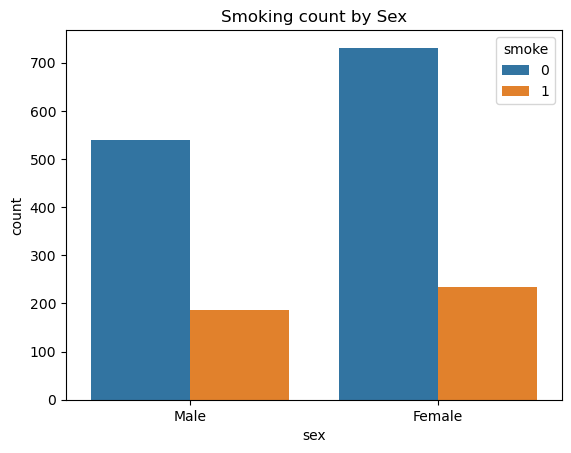

In [320]:
# Seaborn bar-plot
p = sns.countplot(data=smoking, x="sex", hue="smoke").set(title='Smoking count by Sex')

Contrary to initial prediction, the ratio of male to female smokers is about the same. As for non-smokers female are even greater than that of the male!
What about age, status or education?

In [321]:
smoking = smoking.drop(smoking[smoking['smoke'] == 0].index)
smoking.head()

,sex,age,status,education,nationality,ethnicity,gross_income,region,smoke,weekends,weekdays,type
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,1,12,12,Packets
6,Male,53,Married,Degree,British,White,"Above 36,400",The North,1,6,6,Packets
8,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,1,8,8,Hand-Rolled
9,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,1,15,12,Packets
20,Female,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,1,6,12,Packets


In [322]:
# Descriptive statistics (numeric columns only)
smoking.describe()

,age,smoke,weekends,weekdays
count,421,421,421,421
mean,43,1,16,14
std,16,0,10,9
min,16,1,0,0
25%,30,1,10,7
50%,40,1,15,12
75%,54,1,20,20
max,93,1,60,55


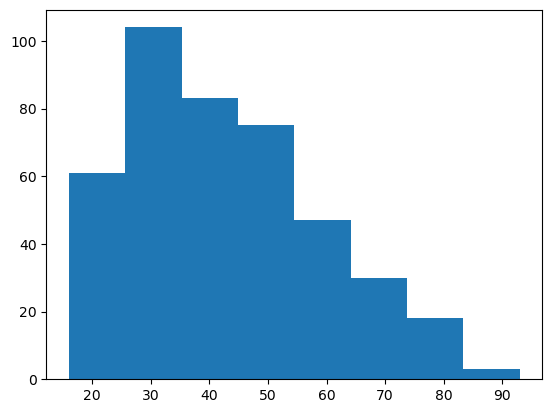

In [323]:
# Age histogram
h = smoking.age.hist(bins=8, grid=False)

<Axes: xlabel='age', ylabel='Density'>

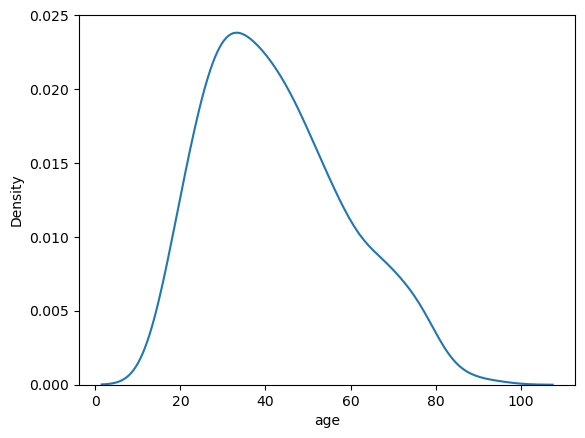

In [324]:
# Age Distribution
h = smoking.age
sns.kdeplot(data=h)

In [325]:
# Smoking vs. marital status
print(f"Divorced: {smoking[smoking['status'] == 'Divorced'].shape[0]}\n"
      f"Married: {smoking[smoking['status'] == 'Married'].shape[0]}\n"
      f"Separated: {smoking[smoking['status'] == 'Separated'].shape[0]}\n"
      f"Single: {smoking[smoking['status'] == 'Single'].shape[0]}\n"
      f"Widowed: {smoking[smoking['status'] == 'Widowed'].shape[0]}")

Divorced: 58
Married: 143
Separated: 22
Single: 158
Widowed: 40


In [326]:
status_counts = smoking['status'].value_counts()

# Sort the status counts from most to least
status_counts_sorted = status_counts.sort_values(ascending=False)

# Print the results
for status, count in status_counts_sorted.items():
    print(f"{status}: {count}")

Single: 158
Married: 143
Divorced: 58
Widowed: 40
Separated: 22


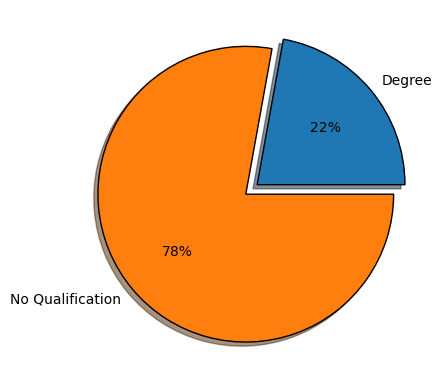

In [327]:
# Using only highest and lowest levels of education acheived for the sake of simplicity
max_level = smoking[smoking.education == 'Degree'].shape[0]
min_level = smoking[smoking.education == 'No Qualification'].shape[0]

data = [max_level, min_level]
keys = ['Degree', 'No Qualification']

# Pie chart of percentage of smokers who are educated vs non-educated
explode = [0.1, 0]
plt.pie(data, labels=keys, explode=explode, shadow = True, autopct='%.0f%%', wedgeprops= {"edgecolor":"black", 
                     'linewidth': 1})
plt.show()

## Manipulation
Manipulating the dataframe even further.

In [328]:
# Add weekends and weekdays column into new column 'frequency'
smoking['frequency'] = smoking.weekends + smoking.weekdays
smoking.columns = ["sex","age","status","education","nationality", "ethnicity", "gross_income", "region", "smoke", "weekends", "weekdays", "type", "frequency"]

# Remove 'Refused' and 'Unkown' responses from income group
smoking = smoking.drop(smoking[smoking['gross_income'] == "Refused"].index)
smoking = smoking.drop(smoking[smoking['gross_income'] == "Unknown"].index)

# Create function to rename income levels
def new_income_labels(income):
    if income == 'Under 2,600':
        return '<2.6k'
    elif income == 'Above 36,400':
        return '>36.4k'
    else:
        lower, upper = map(int, income.replace(',', '').split(' to '))
        return f'{lower / 1000}-{upper / 1000}k'

smoking['gross_income'] = smoking['gross_income'].apply(new_income_labels)

#Verify the changes
smoking.head()

,sex,age,status,education,nationality,ethnicity,gross_income,region,smoke,weekends,weekdays,type,frequency
1,Female,42,Single,No Qualification,British,White,<2.6k,The North,1,12,12,Packets,24
6,Male,53,Married,Degree,British,White,>36.4k,The North,1,6,6,Packets,12
8,Male,40,Single,GCSE/CSE,English,White,2.6-5.2k,The North,1,8,8,Hand-Rolled,16
9,Female,41,Married,No Qualification,English,White,5.2-10.4k,The North,1,15,12,Packets,27
20,Female,34,Married,GCSE/CSE,British,White,2.6-5.2k,The North,1,6,12,Packets,18


Does addiction transcend means?

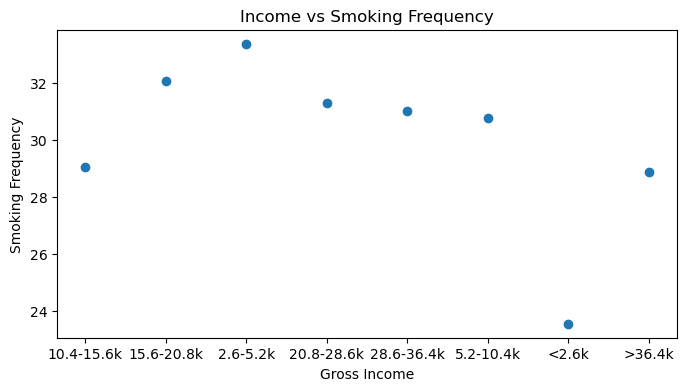

In [329]:
income_vs_frequency = smoking[['gross_income', 'frequency']]

# Grouping by 'gross_income' and calculating the mean of 'frequency' for each income group
grouped_data = income_vs_frequency.groupby('gross_income').mean()

# Plotting the data
plt.figure(figsize=(8, 4))
plt.scatter(grouped_data.index, grouped_data['frequency'])
plt.title('Income vs Smoking Frequency')
plt.xlabel('Gross Income')
plt.ylabel('Smoking Frequency')
plt.show()

## Discussion

### Overview
The analysis of this 'smoking' dataset, consisting of 1691 individuals, aimed to uncover trends and patterns in smoking habits across various demographic factors. Key variables explored include gender, age, marital status, education, and income.

### Summary of Findings
#### Sample Characteristics
---
The sample comprised 1691 individuals, with 421 identified as smokers and 1270 as non-smokers. This distribution provides a substantial dataset for understanding smoking habits in the UK. 24.9% of the dataset are smokers. It is unknown when this data was collected, as the proportion of smokers in the UK as of 2022 was only 12.9%. 

#### Gender Disparities:
---
The dataset revealed that out of the 421 smokers, 187 were male, and 234 were female. Non-smokers included 539 males and 731 females. This highlights a relatively balanced dispersion of smoking habits across genders. Although, females seem to abstain from the vice more than males. 

#### Age:
---
The analysis of age-related data showed that the average age of smokers is 43, with a minimum age of 16 and a maximum of 93. Smokers tend to have a slightly higher mean age compared to the overall sample, indicating correlation between age and smoking. The distribution was right skewed, furthering the conclusion that younger people in the UK smoke more than older generation. This aligns logically that older folks tend to guard their health more dilligently.

#### Marital Status:
---
The dataset included individuals with various marital statuses. The count of smokers among different marital statuses indicated that single individuals comprised the largest group of smokers (158), with separated being the least (22). It is unclear that marital status may influence smoking behavior.

#### Education Levels:
---
Those with no qualifications grossly outnumbered those with higher education. Clearly, people with potentially more knowledge on the effects of smoking sought to avert from it.

#### Gross Income Categories:
---
Notably, smokers were observed across various income levels, emphasizing that smoking is not confined to a specific economic stratum. However, lowest earners purchased cigarettes least frequently. Average earners purchased most frequently. And highest earners purchased moderately.

### Implications and Recommendations:
- Targeted Interventions: Understanding the demographics of smokers can inform targeted interventions. For instance, tailoring anti-smoking campaigns for specific age groups and education levels may enhance their effectiveness.

- Further research could delve into additional variables and conduct longitudinal studies to track changes in smoking behavior over time.

## References
Arel-Bundock V (2023). Rdatasets: A collection of datasets originally distributed in various R packages. R package version 1.0.0, https://vincentarelbundock.github.io/Rdatasets.

Lauren Revie, D. M. (2023, September 4). Adult smoking habits in the UK: 2022. Adult smoking habits in the UK - Office for National Statistics. https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandlifeexpectancies/bulletins/adultsmokinghabitsingreatbritain/2022#:~:text=Based%20on%20APS%20data%2C%20the,20.2%25%20of%20the%20population. 